In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [547]:
X_train = pd.read_csv('/content/ZB_U.dat', sep='\t', decimal=',',  encoding='latin-1', skiprows=2, names = ['T', 'p', 'density'])
X_test = pd.read_csv('/content/ZB_T.dat', sep='\t', decimal=',',  encoding='latin-1', skiprows=2, names = ['T', 'p', 'density'])

In [548]:
#check datatypes, basic info
print('TRAIN SET BASIC INFORMATION\n')
print({X_train.info()})
print('---------------------')
print('TEST SET BASIC INFORMATION\n')
print(X_test.info())

TRAIN SET BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T        110 non-null    int64  
 1   p        110 non-null    float64
 2   density  110 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB
{None}
---------------------
TEST SET BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T        24 non-null     int64  
 1   p        24 non-null     float64
 2   density  24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 704.0 bytes
None


In [549]:
X_train.head()

,T,p,density
0,273,1.01325,1.249977
1,273,2.00000,2.467263
2,273,3.00000,3.700894
3,273,4.00000,4.934525
4,273,5.00000,6.168156


## 2. Exploratory data anylysis

### 2.1 Temperature

Text(0, 0.5, 'Temperature. K')

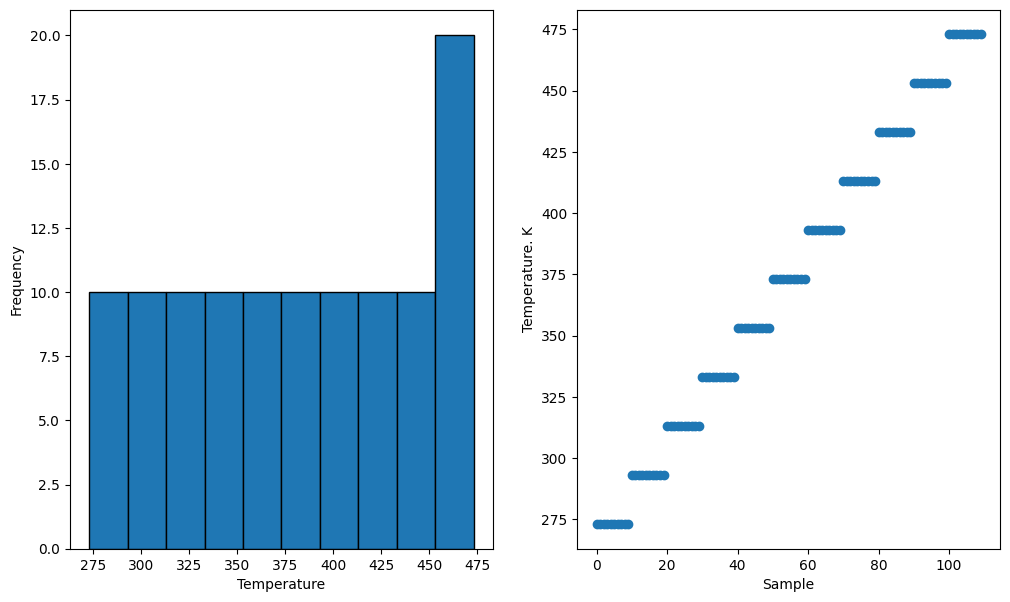

In [550]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.hist(X_train['T'], edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.scatter(x=range(len(X_train['T'])), y=X_train['T'])
plt.xlabel('Sample')
plt.ylabel('Temperature. K')

### 2.2 Pressure

In [551]:
X_train['p'].value_counts()

2.00000     11
3.00000     11
4.00000     11
5.00000     11
6.00000     11
7.00000     11
8.00000     11
9.00000     11
10.00000    11
1.00000      9
1.01325      2
Name: p, dtype: int64

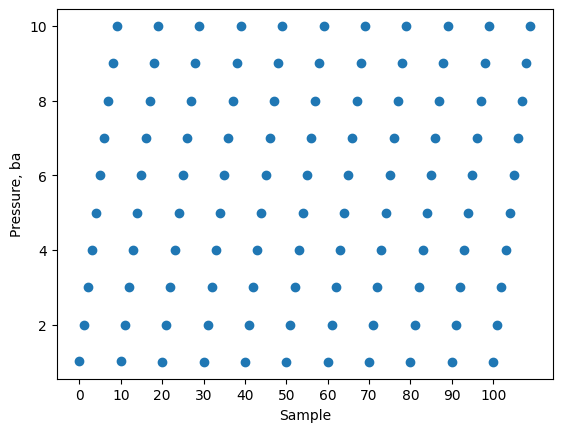

In [552]:
plt.scatter(range(len(X_train['p'])), X_train['p'])
plt.xlabel('Sample')
plt.ylabel('Pressure, ba')
plt.xticks(np.arange(0, 101, 10))
plt.show()

### 2.3 Density

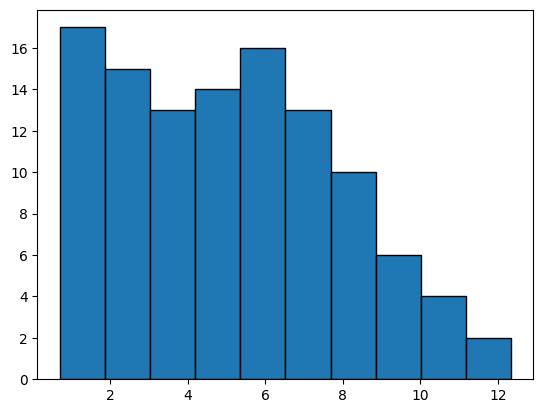

In [553]:
plt.hist(X_train['density'], edgecolor='black');

##3. Split datasets into input and output signals

In [554]:
y_train = X_train['density']
X_train = X_train[['T', 'p']]
y_test = X_test['density']
X_test = X_test[['T', 'p']]

##4. Data normalization

In [555]:
class CustomScaler:
  def __init__(self):
    self.wmax = None
    self.wmin = None

  def fit(self, data):
    self.wmax = np.max(data)
    self.wmin = np.min(data)

  def transform(self, data):
      return (self.wmax - data) / (self.wmax - self.wmin)

  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)    

In [556]:
scaler = CustomScaler()

In [557]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [558]:
#train dataset after normalization
X_train.head()

,T,p
0,1.0,0.998528
1,1.0,0.888889
2,1.0,0.777778
3,1.0,0.666667
4,1.0,0.555556


## 4. Train data shuffle

In [559]:
X_train = X_train.sample(frac=1, random_state=42)

In [560]:
#Shuffled train set
X_train.head()

,T,p
78,0.3,0.111111
10,0.9,0.998528
4,1.0,0.555556
84,0.2,0.555556
64,0.4,0.555556


##5. Save Train and Test datasets

In [561]:
X_train.to_csv('Walicki_ZU.dat', sep='\t', index=True)
X_test.to_csv('Walicki_ZT.dat', sep='\t', index=True)

##6. Neural network

In [562]:
import tensorflow as tf
import datetime
from tensorflow.keras.optimizers import Adam

In [563]:
model = tf.keras.models.Sequential()

#hidden layer
layer_1 = tf.keras.layers.Dense(64, input_dim=2, activation='relu')
#hidden layer 2
layer_2 = tf.keras.layers.Dense(32, activation='relu')
#Regularization layer
layer_3 = tf.keras.layers.Dropout(0.2)
#output layer
layer_4 = tf.keras.layers.Dense(1)

model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [564]:
model.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.1)
)

In [565]:
log_dir = 'DW_' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [566]:
nn = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    callbacks = [
      tensorboard_callback
    ]
)

Epoch 1/20
4/4 [==============================] - 2s 109ms/step - loss: 38.1519 - val_loss: 22.6088
Epoch 2/20
4/4 [==============================] - 0s 42ms/step - loss: 27.0336 - val_loss: 31.5702
Epoch 3/20
4/4 [==============================] - 0s 45ms/step - loss: 28.1218 - val_loss: 26.2083
Epoch 4/20
4/4 [==============================] - 0s 35ms/step - loss: 22.4833 - val_loss: 18.2097
Epoch 5/20
4/4 [==============================] - 0s 38ms/step - loss: 14.4496 - val_loss: 10.5502
Epoch 6/20
4/4 [==============================] - 0s 38ms/step - loss: 11.8716 - val_loss: 10.9605
Epoch 7/20
4/4 [==============================] - 0s 34ms/step - loss: 10.8023 - val_loss: 9.6674
Epoch 8/20
4/4 [==============================] - 0s 35ms/step - loss: 9.0307 - val_loss: 9.8847
Epoch 9/20
4/4 [==============================] - 0s 40ms/step - loss: 8.8368 - val_loss: 9.5367
Epoch 10/20
4/4 [==============================] - 0s 37ms/step - loss: 8.6353 - val_loss: 8.9645
Epoch 11/20
4/4

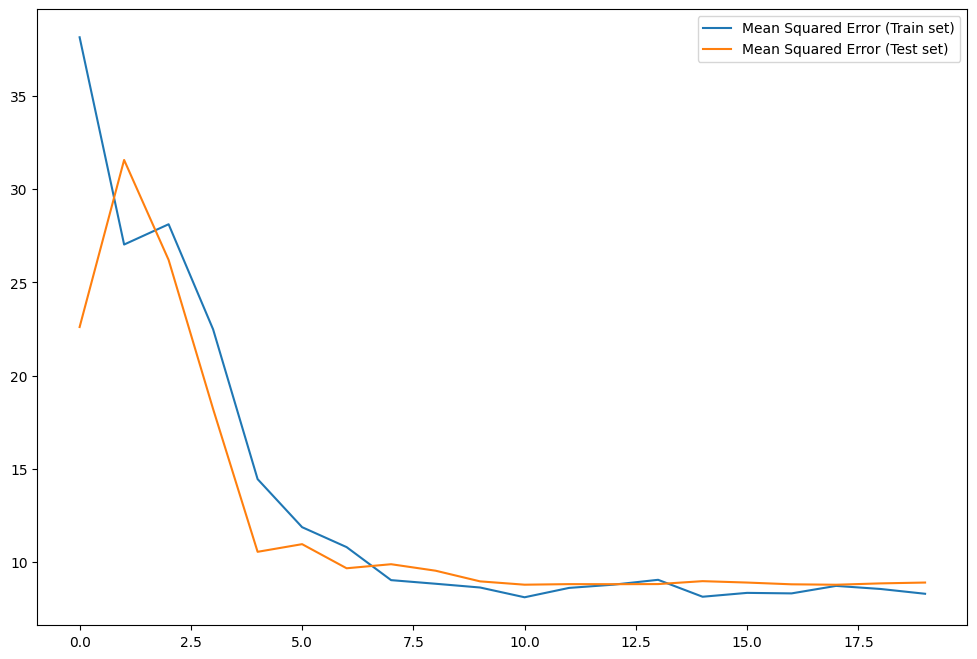

In [567]:
plt.figure(figsize=(12, 8))
plt.plot(nn.history['loss'], label='Mean Squared Error (Train set)')
plt.plot(nn.history['val_loss'], label='Mean Squared Error (Test set)')
plt.legend()